## 4. GeoDataFrame ve GeoSeries

Geopandas kütüphanesi ile coğrafi verinin nasıl yükleneceğini inceledik. Veri yüklendiğinde, coğrafi geometrik verileri içeren bir tablo elde etmekteyiz. Bu geometrik veriler, konumsal analizleri gerçekleştirmemize ve tablo verisi üzerinde pandas kütüphanesini kullanarak çeşitli sayısal analizler yapmamıza yardımcı olur.

Eğer bir sütundan daha fazla verimiz varsa, bu verilere GeoDataFrame (Coğrafi Veri Çerçevesi) ismi verilmektedir. Eğer tek sütunlu bir veri ile çalışıyorsak, bunun ismi de GeoSeries olarak bilinmektedir. Buradaki farklılık pandas veri çerçeveleri ve serileri arasındaki farklılığa benzemektedir. Farklı taraflarını gözlemleyelim. 

In [13]:
import geopandas as gpd
import pandas as pd

In [14]:
# 1. Ülkeler veri setini okuyalım
shp = 'countries.shp'
ulkeler = gpd.read_file(shp)
ulkeler.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [15]:
# 2. Ülkelerin İsim (NAME) ve Tahmini nüfus (POP_EST) sütunlarını ayıklayarak yeni bir veri çerçevesi oluşturalım (dataFrame)
dataFrame = ulkeler[['NAME', 'POP_EST']]

dataFrame.head()

,NAME,POP_EST
0,Indonesia,260580739
1,Malaysia,31381992
2,Chile,17789267
3,Bolivia,11138234
4,Peru,31036656


In [16]:
type(dataFrame)

# Herhangi bir coğrafi veri içeren sütun olmadığı için dataFrame'in bir pandas veri çerçevesi olduğunu görmekteyiz. 

pandas.core.frame.DataFrame

In [17]:
# 3. Şimdi bu verisetinin ülke isimleri (NAME) ve ülkelerin geometri (geometry) sütunlarını ayıklayalım.
geoDataFrame = ulkeler[['NAME', 'geometry']]
geoDataFrame.head()


,NAME,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [18]:
type(geoDataFrame)
# Konumsal veri içerdiği için bir Geopandas GeoDataFrame elde ettik.

geopandas.geodataframe.GeoDataFrame

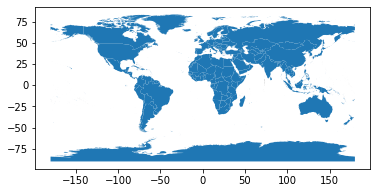

In [19]:
# 4. Bu GeoDataFrame'i çizdirelim.
geoDataFrame.plot();

In [20]:
# 5. Sadece ülkelerin isimlerini içeren sütunu ayıklayalım (NAME)
series = ulkeler['NAME']
series[:5]


0    Indonesia
1     Malaysia
2        Chile
3      Bolivia
4         Peru
Name: NAME, dtype: object

In [21]:
type(series)
# Görüleceği üzere tek bir sütun olduğu için sadece pandas serisi elde ettik. 

pandas.core.series.Series

In [22]:
# 6. Sadece geometri sütununu ayıklayalım. 
geoSeries = ulkeler['geometry']
geoSeries[:5]


0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

In [23]:
type(geoSeries)
# Tek bir sütun olduğundan bir seridir. Ancak sütun coğrafi veri içerdiğinden bun bir geopandas serisi olacaktır. 

geopandas.geoseries.GeoSeries

<AxesSubplot:>

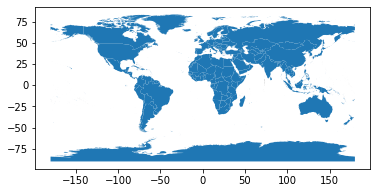

In [24]:
geoSeries.plot()